# K-means clustering

## import library

In [774]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [775]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

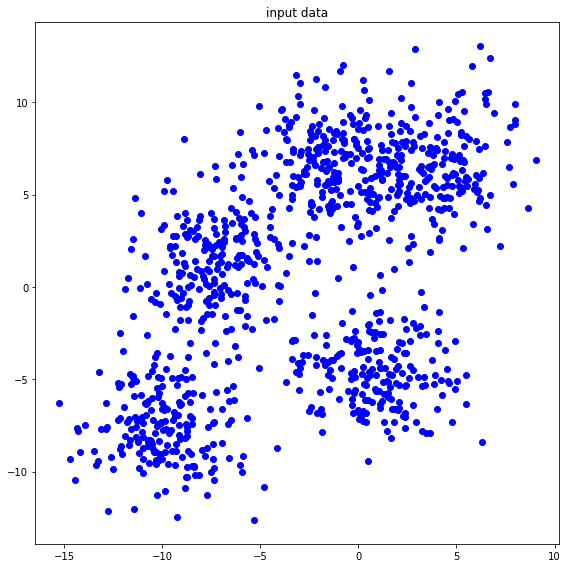

In [776]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [777]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # print(feature, center)
    difference=feature-center
    # print(difference)
    distance=(difference[:,0]**2+difference[:,1]**2)**(1/2)
    # distance=np.dot(difference.T, difference)**(1/2)
    # print(distance.shape)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [778]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks 
    #
    # print(label_feature.shape)
    # label_feature_temp=np.c_[label_feature,np.ones(len(label_feature))]
    # target_feature=feature[label_feature_temp[:,0] == label]
    # print(label_feature_temp)
    
    # print(label_feature)
    # print(feature)
    target_feature=feature[label_feature == label]
    # print(target_feature)
    center_x=target_feature[:,0].mean()
    center_y=target_feature[:,1].mean()
    centroid=np.c_[center_x,center_y]
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [779]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    label_feature=np.argmin(distance,axis=1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [780]:
number_cluster          = 2
number_iteration        = 5     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
print(centroid_iteration_02.shape)
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))
print(label_feature_02[0])

(5, 2, 2)
0


In [781]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros((number_data,number_cluster))
centroid = centroid_iteration_02
label_feature=label_feature_02
label=np.array(range(number_cluster))
# print(label)

for iteration in range(number_iteration):
    for i in label:
        center= compute_centroid(feature, label_feature,i) 
        centroid[iteration,i,:] =center
        # print(center)
        # print(compute_distance(feature, center))
        # print(distance.shape)
        distance[:,i] = compute_distance(feature, center) #nx1

    label_feature = compute_label(distance)
    # print(label_feature)
    loss= distance.mean()

    loss_iteration_02[i]     = loss
    centroid_iteration_02 = centroid
    label_feature_02  = label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [782]:
number_cluster          = 4
number_iteration        = 5     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [783]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros((number_data,number_cluster))
centroid = centroid_iteration_04
label_feature=label_feature_04
label=np.array(range(number_cluster))

for iteration in range(number_iteration):
    for i in label:
        center= compute_centroid(feature, label_feature,i) 
        centroid[iteration,i,:] =center
        distance[:,i] = compute_distance(feature, center)

    label_feature = compute_label(distance)

    loss=0
    for i in label:
        target_feature=feature[label_feature == i]
        difference=target_feature-centroid[iteration,i,:]
        distance_each=(difference[:,0]**2+difference[:,1]**2)**(1/2)
        loss+=distance_each.mean()

    loss_iteration_04[i]     = loss
    centroid_iteration_04 = centroid
    label_feature_04  = label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [784]:
number_cluster          = 8
number_iteration        = 20     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [785]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros((number_data,number_cluster))
centroid = centroid_iteration_08
label_feature=label_feature_08
label=np.array(range(number_cluster))

for iteration in range(number_iteration):
    for i in label:
        center= compute_centroid(feature, label_feature,i) 
        centroid[iteration,i,:] =center
        distance[:,i] = compute_distance(feature, center)

    label_feature = compute_label(distance)
    
    loss=0
    for i in label:
        target_feature=feature[label_feature == i]
        difference=target_feature-centroid[iteration,i,:]
        distance_each=(difference[:,0]**2+difference[:,1]**2)**(1/2)
        print(distance_each)
        loss+=distance_each.mean()

    loss_iteration_08[i]     = loss
    centroid_iteration_08 = centroid
    label_feature_08  = label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

[ 4.8158016   9.21520277  6.18831171 11.25430484  5.73965293  4.565144
  6.72097253  3.92901964  7.28777197 12.46766659  1.47699475  3.40159609
  2.71072818  9.66868217  6.51965639 10.62582431 11.06768455 11.55690748
 11.83395012  8.61739719  9.64963934  8.67747511  7.48875444 12.36913921
  6.74727322  8.2978656   8.55675127 10.95833591  7.36482076  8.97381444
 10.87145631  9.00643517  4.27594151  4.42235084  5.49318365 12.09269082
 11.37382535  8.67373039  6.01014819  6.41712801  2.55797658 11.24042602
  5.67303837  9.29773628  6.28373819  4.04650124  5.34015205  8.35866448
  2.89927187  7.85193612  9.24566329  9.2748997   7.16587558 10.73413505
  5.71569684  9.01002003  7.66031322 12.5139716   6.95109943  8.3999498
 10.01565113  3.25211708 10.12290622  9.2049201   6.62705006  9.82781874
  7.46043938  7.87782789  7.10249167  3.92048842  9.7437395  11.09081789
 10.65999007  9.82879643 10.18455206  9.88766085  4.64757838  8.29242538
  7.44110083  6.71582431  5.54137933  9.5772178  10.90

<ipython-input-785-b21252febb57>:23: RuntimeWarning: Mean of empty slice.
  loss+=distance_each.mean()
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-778-e30c34b7398d>:15: RuntimeWarning: Mean of empty slice.
  center_x=target_feature[:,0].mean()
<ipython-input-778-e30c34b7398d>:16: RuntimeWarning: Mean of empty slice.
  center_y=target_feature[:,1].mean()



[]
[]
[]
[]
[]
[]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan

## the number of clusters $K = 16$

In [786]:
number_cluster          = 16
number_iteration        = 30   # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [787]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros((number_data,number_cluster))
centroid = centroid_iteration_16
label_feature=label_feature_16
label=np.array(range(number_cluster))

for iteration in range(number_iteration):
    for i in label:
        center= compute_centroid(feature, label_feature,i) 
        centroid[iteration,i,:] =center
        distance[:,i] = compute_distance(feature, center)

    label_feature = compute_label(distance)
    loss=0
    for i in label:
        target_feature=feature[label_feature == i]
        difference=target_feature-centroid[iteration,i,:]
        distance_each=(difference[:,0]**2+difference[:,1]**2)**(1/2)
        loss+=distance_each.mean()

    loss_iteration_16[i]     = loss
    label_feature_16  = label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

<ipython-input-787-145ed00f13c5>:21: RuntimeWarning: Mean of empty slice.
  loss+=distance_each.mean()
<ipython-input-778-e30c34b7398d>:15: RuntimeWarning: Mean of empty slice.
  center_x=target_feature[:,0].mean()
<ipython-input-778-e30c34b7398d>:16: RuntimeWarning: Mean of empty slice.
  center_y=target_feature[:,1].mean()


---

---

## functions for presenting the results

---

---

In [788]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [789]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [790]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [791]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [792]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [793]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [794]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [795]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [796]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [797]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [798]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [799]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [800]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [801]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [802]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [803]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) =  0.0000000000
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) =  0.0000000000
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  0.0000000000
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  0.0000000000
**************************************************
## [RESULT 05]
**************************************************


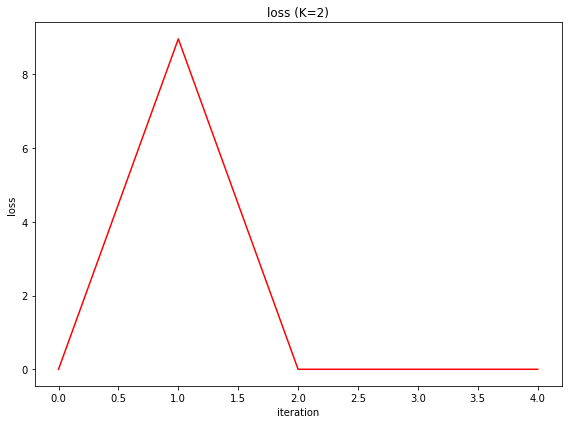

**************************************************
## [RESULT 06]
**************************************************


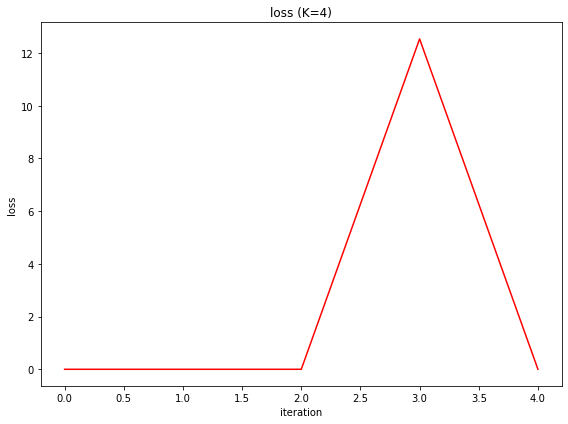

**************************************************
## [RESULT 07]
**************************************************


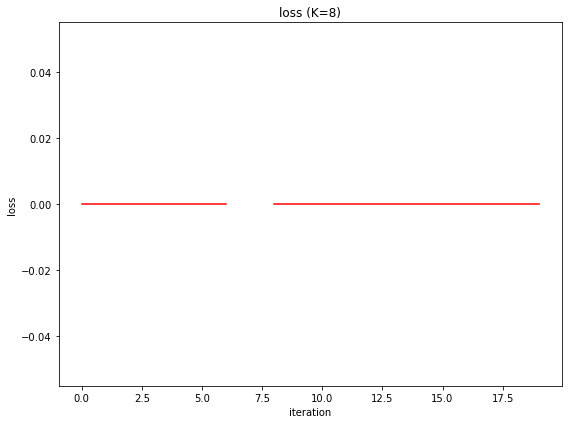

**************************************************
## [RESULT 08]
**************************************************


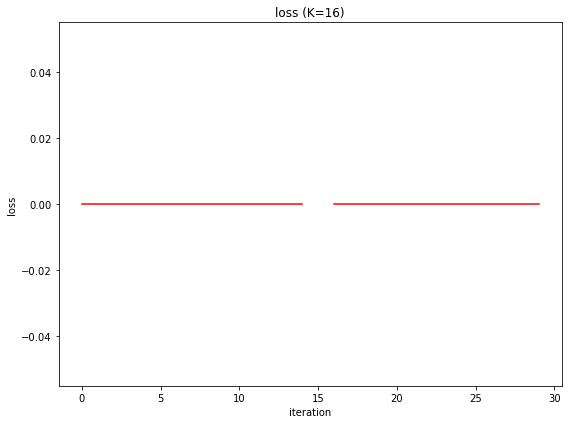

**************************************************
## [RESULT 09]
**************************************************
**************************************************
## [RESULT 10]
**************************************************
**************************************************
## [RESULT 11]
**************************************************
**************************************************
## [RESULT 12]
**************************************************
**************************************************
## [RESULT 13]
**************************************************
**************************************************
## [RESULT 14]
**************************************************
**************************************************
## [RESULT 15]
**************************************************
**************************************************
## [RESULT 16]
**************************************************


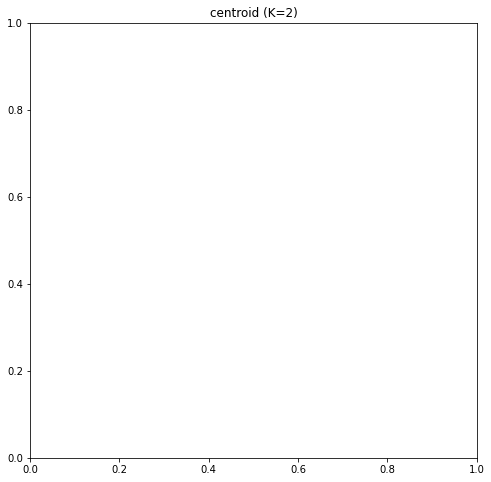

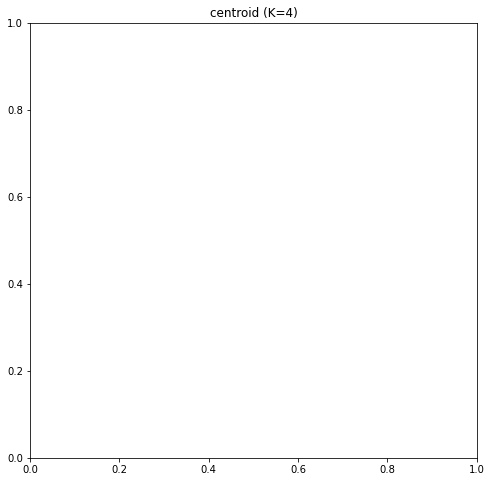

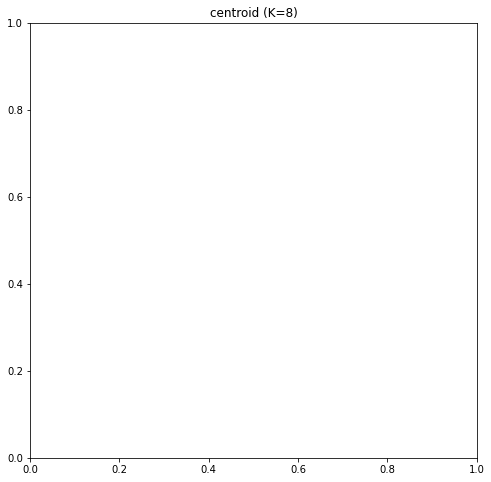

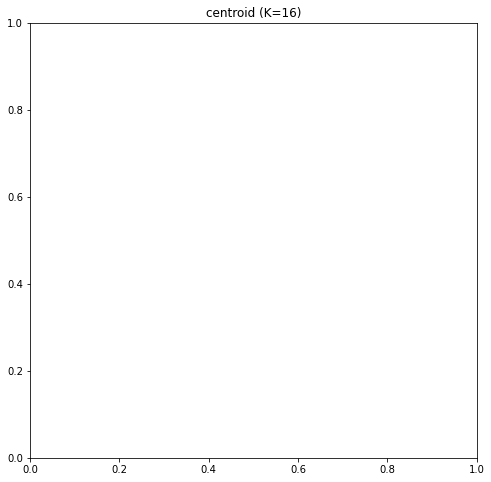

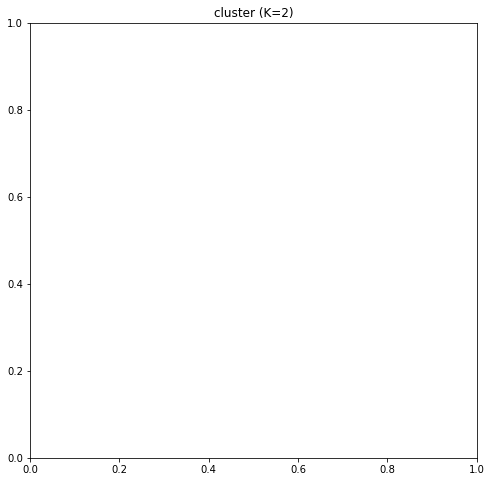

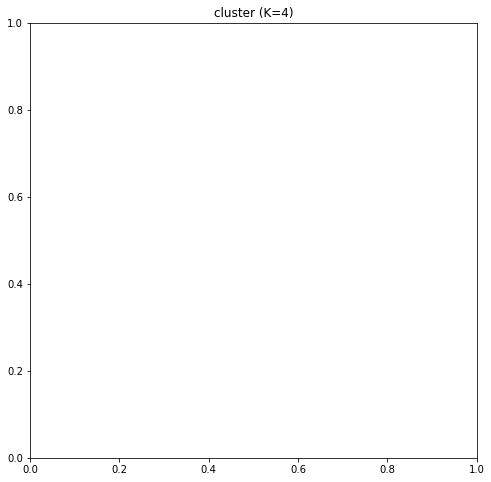

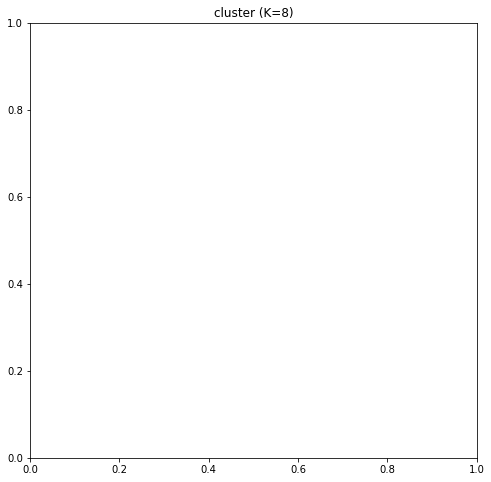

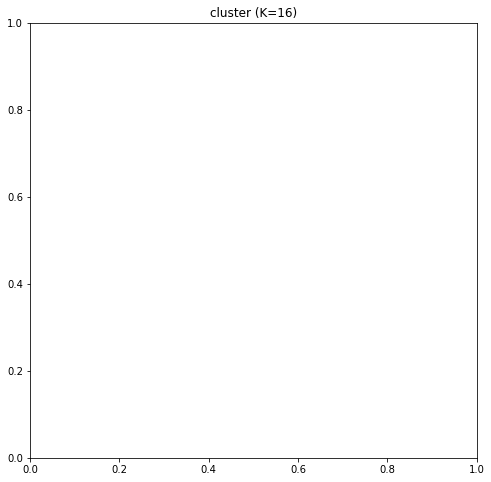

In [804]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)